In [49]:
# Load libraries
from pandas import read_csv
url = "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"

# La siguiente línea no es necesaria usando esta fuente, pues ya incluye la cabecera
#names = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']
#dataset = read_csv(url, names=names)
dataset = read_csv(url)
# mostramos la "forma", debería haber 150 entradas con 5 atributos cada una

print(dataset.shape)

(150, 5)


In [50]:
# mostramos las 3 primeras entradas para echar un vistazo
print(dataset.head(10))

   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
6          4.6         3.4          1.4         0.3  Iris-setosa
7          5.0         3.4          1.5         0.2  Iris-setosa
8          4.4         2.9          1.4         0.2  Iris-setosa
9          4.9         3.1          1.5         0.1  Iris-setosa


In [51]:
# mostramos un resumen estadístico de los datos
print(dataset.describe())

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [52]:
# distribución por clases
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

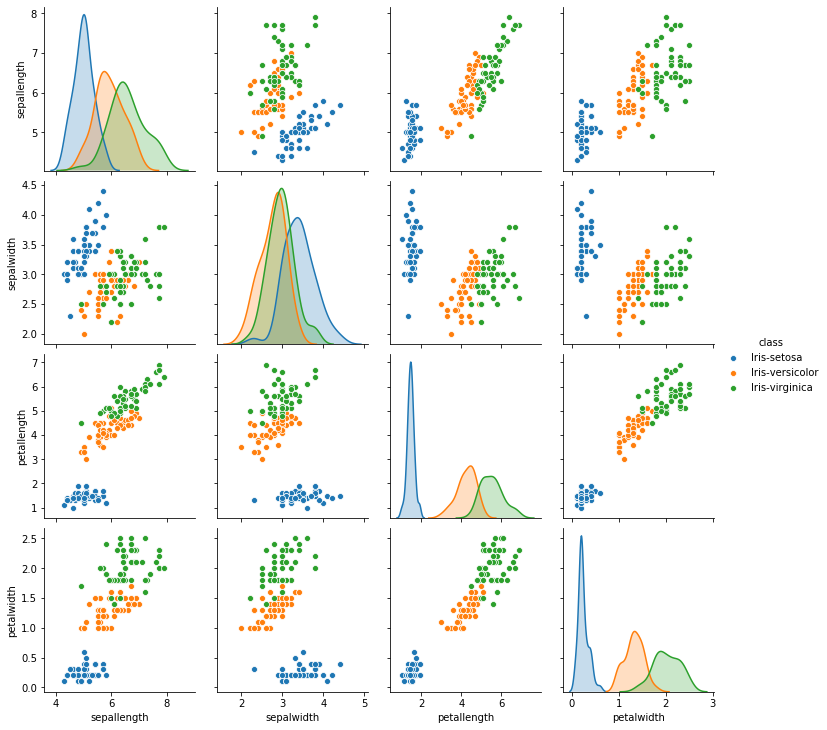

In [54]:
sns.pairplot( data=dataset, vars=('sepallength','sepalwidth','petallength','petalwidth'), hue='class' )
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [56]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]

In [57]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [58]:
# Cargamos los algoritmos
models = []
models.append(("RF", RandomForestClassifier(n_jobs=2, random_state=0)))

In [59]:
models.append(("KNN", KNeighborsClassifier()))

In [60]:
models.append(("NB", GaussianNB()))

In [61]:
models.append(("SVM", SVC(gamma='auto')))

In [62]:
models.append(("MLP", MLPClassifier(activation="relu"
                                    ,   alpha=1e05
                                    ,   batch_size="auto"
                                    ,   beta_1=0.9
                                    ,   beta_2=0.999
                                    ,   early_stopping=False
                                    ,   epsilon=1e08
                                    ,   hidden_layer_sizes=(3, 3)
                                    ,   learning_rate="constant"
                                    ,   learning_rate_init=0.001
                                    ,   max_iter=200
                                    ,   momentum=0.9
                                    ,   nesterovs_momentum=True
                                    ,   power_t=0.5
                                    ,   random_state=1
                                    ,   shuffle=True
                                    ,   solver="lbfgs"
                                    ,   tol=0.0001
                                    ,   validation_fraction=0.1
                                    ,   verbose=False
                                    ,   warm_start=False ) ) )

In [68]:
# evaluamos cada modelo por turnos
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print( '%s: %f (%f)' % ( name, cv_results.mean(), cv_results.std() ) )

RF: 0.941667 (0.075000)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)
MLP: 0.366667 (0.040825)


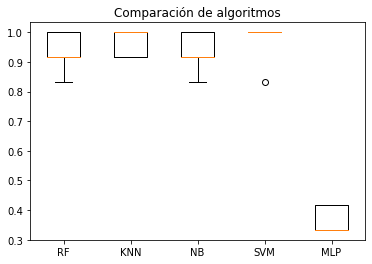

In [67]:
# Comparación de algoritmos
plt.boxplot(results, labels=names)
plt.title('Comparación de algoritmos')
plt.show()